In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('/content/Community_Crime_Statistics_20240522.csv')
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


In [3]:
#shape of the dataset
df.shape

(70661, 5)

In [4]:
#checking for missing values
df.isnull().sum()

,0
Community,0
Category,0
Crime Count,0
Year,0
Month,0


In [5]:
#checking for the datatypes
df.dtypes

,0
Community,object
Category,object
Crime Count,int64
Year,int64
Month,int64


In [6]:
#Descriptive statistics
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


Text(0, 0.5, '')

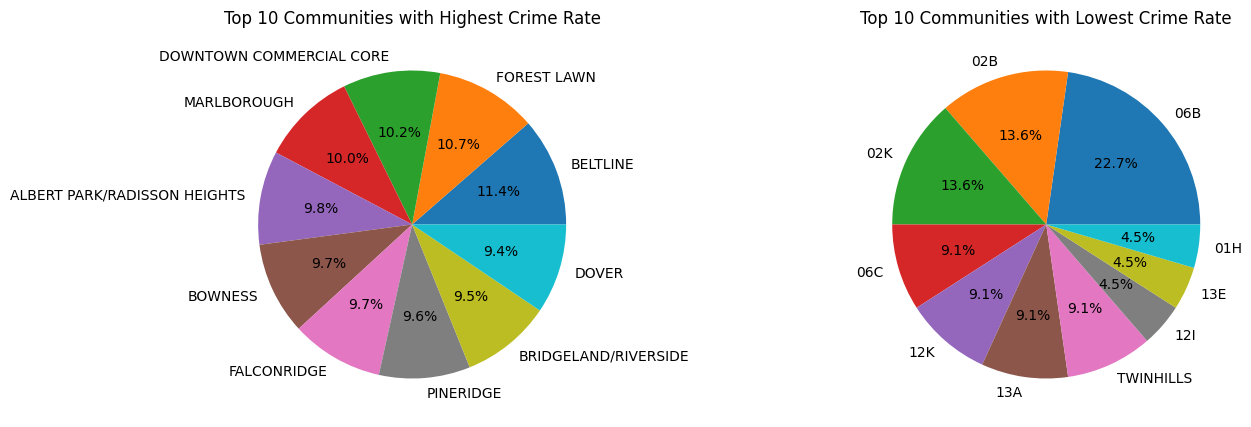

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Top 10 Communities with Highest Crime Rate
df['Community'].value_counts().head(10).plot.pie(autopct='%1.1f%%', ax = ax[0])
ax[0].set_title('Top 10 Communities with Highest Crime Rate')
ax[0].set_ylabel('')

#Top 10 Communities with Lowest Crime Rate
df['Community'].value_counts().tail(10).plot.pie(autopct='%1.1f%%', ax = ax[1])
ax[1].set_title('Top 10 Communities with Lowest Crime Rate')
ax[1].set_ylabel('')


Text(0, 0.5, '')

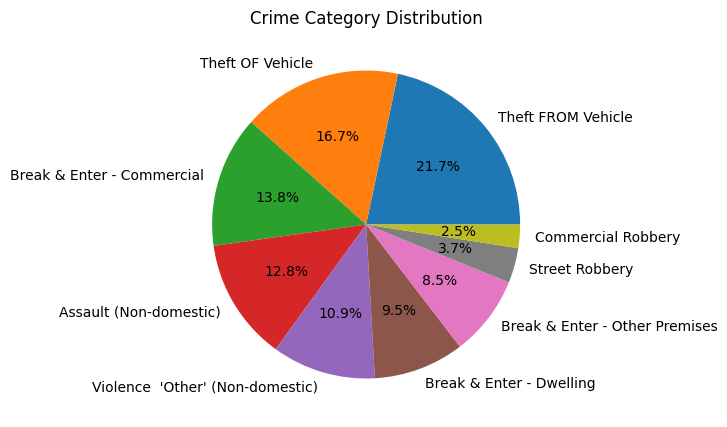

In [8]:
plt.figure(figsize=(5, 5))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Crime Category Distribution')
plt.ylabel('')

Text(0.5, 1.0, 'Crime Reportings by Year')

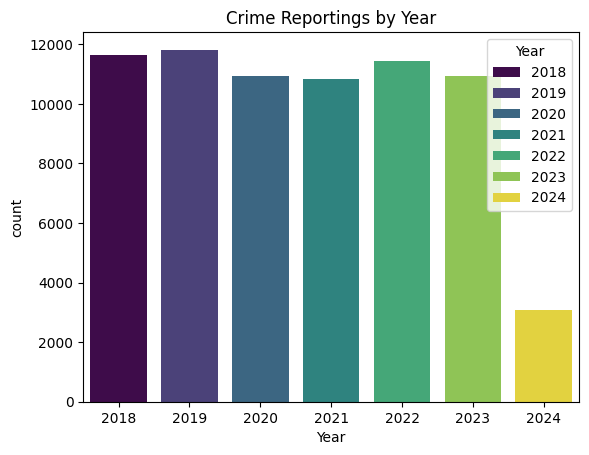

In [9]:
sns.countplot(x = 'Year', data = df, hue = 'Year', palette='viridis').set_title('Crime Reportings by Year')

Text(0.5, 1.0, 'Crime Reportings by Month')

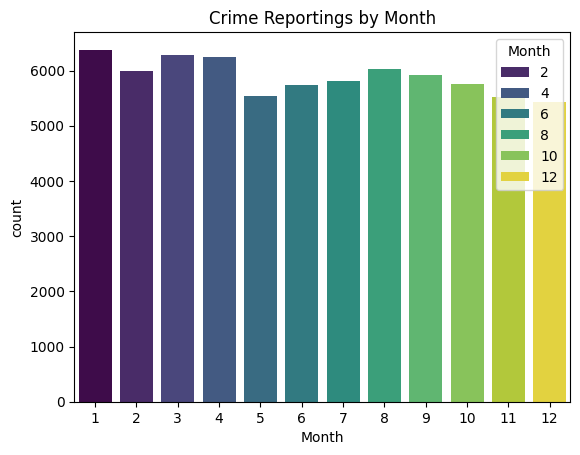

In [10]:
sns.countplot(x = 'Month', data = df, hue = 'Month', palette='viridis').set_title('Crime Reportings by Month')

Text(0.5, 1.0, 'Top 5 Most safest Community and Crime Category')

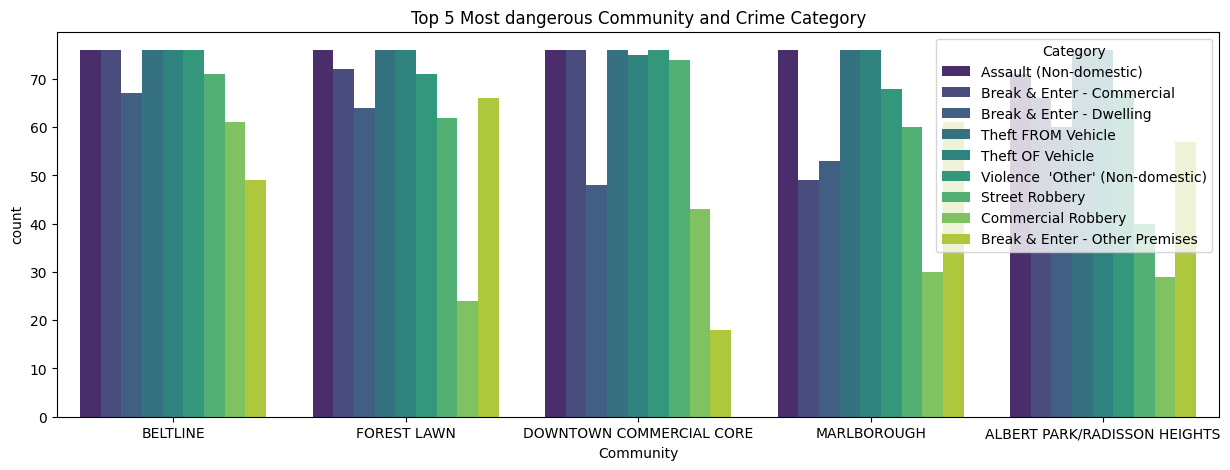

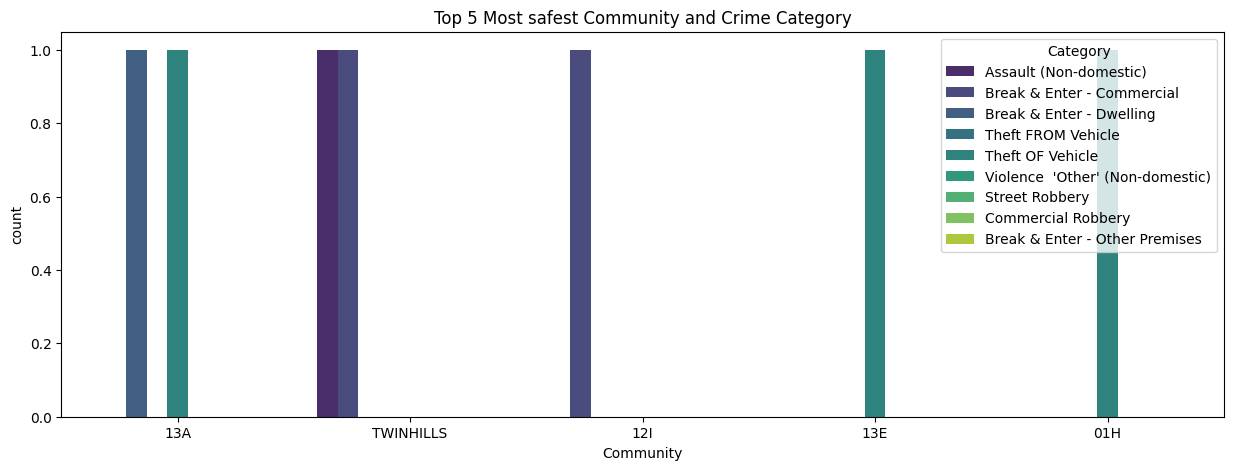

In [11]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().head(5).index).set_title('Top 5 Most dangerous Community and Crime Category')
sns.move_legend(plt.gca(), "upper right")
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Community', data = df, hue = 'Category', palette='viridis', order = df['Community'].value_counts().tail(5).index).set_title('Top 5 Most safest Community and Crime Category')

Text(0.5, 1.0, 'Crime Reportings by Year and Crime Category')

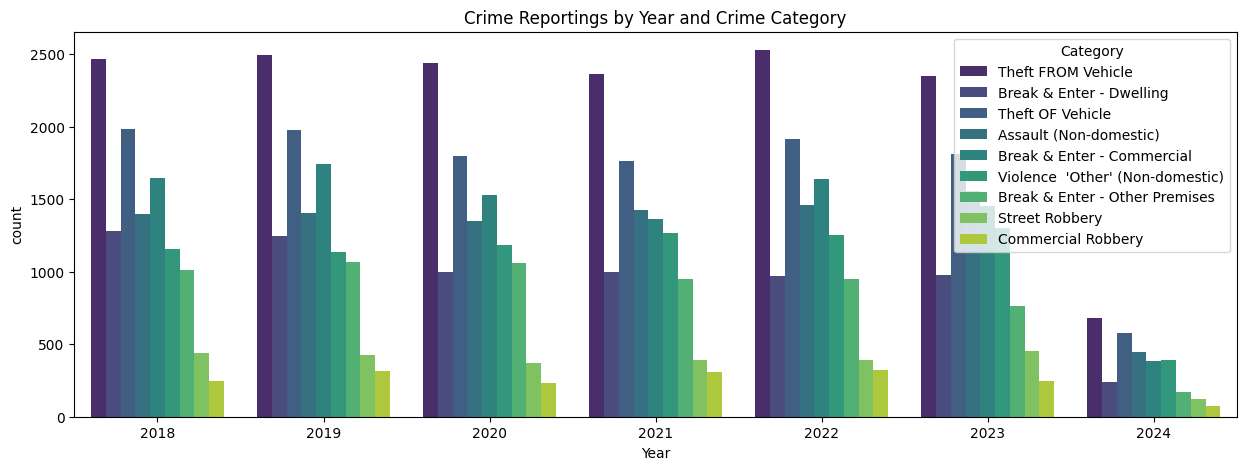

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Year', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Year and Crime Category')

Text(0.5, 1.0, 'Crime Reportings by Month and Crime Category')

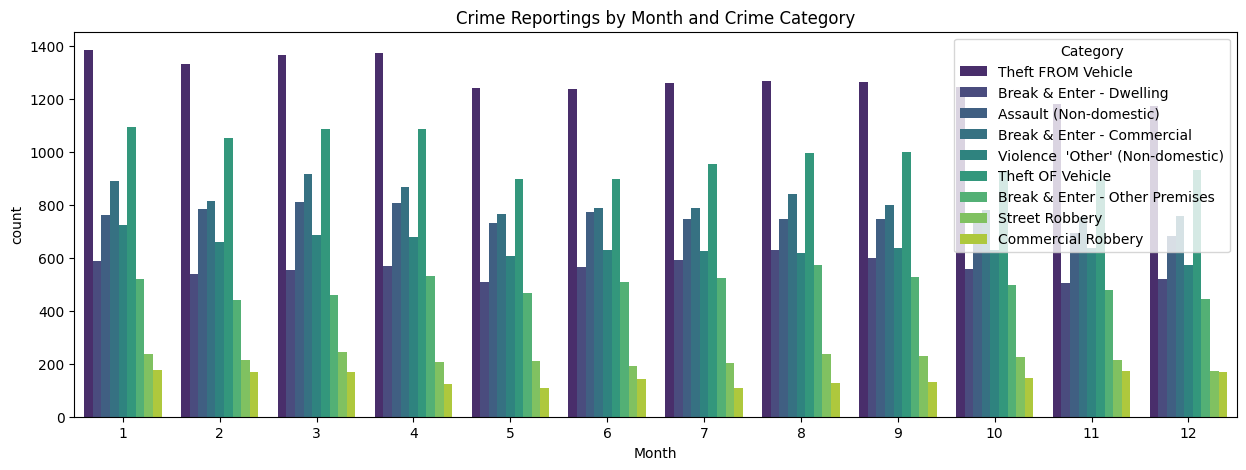

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(x = 'Month', data = df, hue = 'Category', palette='viridis').set_title('Crime Reportings by Month and Crime Category')

In [14]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding Object
le = LabelEncoder()

#Object type columns
object_type_columns = df.select_dtypes(include='object').columns

#Label Encoding
for col in object_type_columns:
    df[col] = le.fit_transform(df[col])
df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


In [15]:
# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length)].to_numpy()
        y = data.iloc[i + seq_length]['Crime Count']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [16]:
seq_length = 3
X, y = create_sequences(df, seq_length)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=16)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3092/3092 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 131.6455 - val_loss: 12.5810
Epoch 2/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 13.7831 - val_loss: 5.7717
Epoch 3/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 7.6628 - val_loss: 5.6272
Epoch 4/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 6.3021 - val_loss: 5.3195
Epoch 5/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 5.7831 - val_loss: 4.8317
Epoch 6/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 5.7794 - val_loss: 5.1155
Epoch 7/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 5.4494 - val_loss: 5.7937
Epoch 8/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 5.6302 - val_loss: 4.8586
Epoch 9/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 5.7273 - val_loss: 6.9568
Epoch 10/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 5.4373 - val_loss: 4.7249
Epoch 11/100
3092/3092 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 5.6392 - val_loss: 5.9858
Epoch 12/100
309

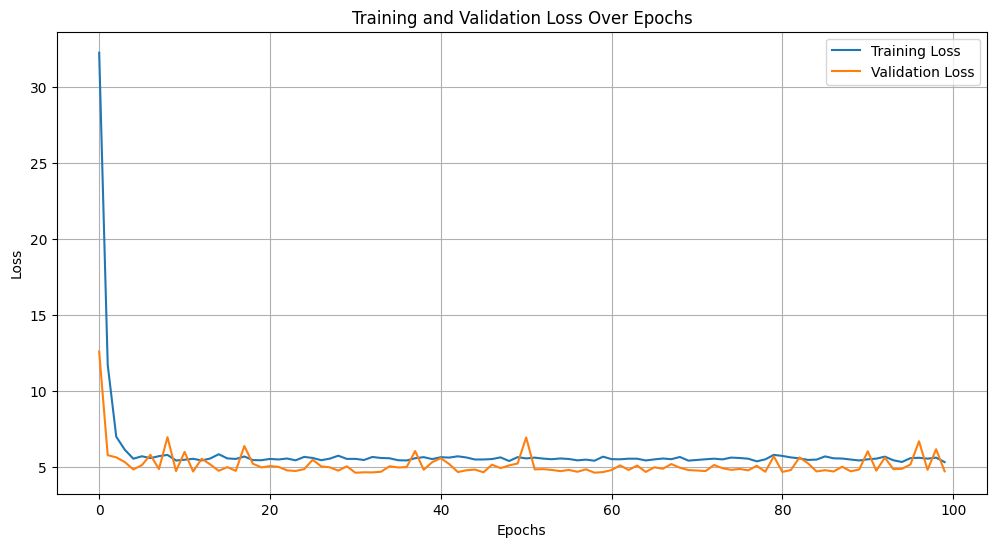

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Predictions
y_pred = model.predict(X_test)


print(f'Predictions: {y_pred.flatten()}')
print(f'True Values: {y_test.flatten()}')


332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4395
Test Loss: 4.6700544357299805
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predictions: [4.4509144 2.0524273 2.2391486 ... 4.1010013 1.8563468 3.5466752]
True Values: [2 1 1 ... 1 2 2]


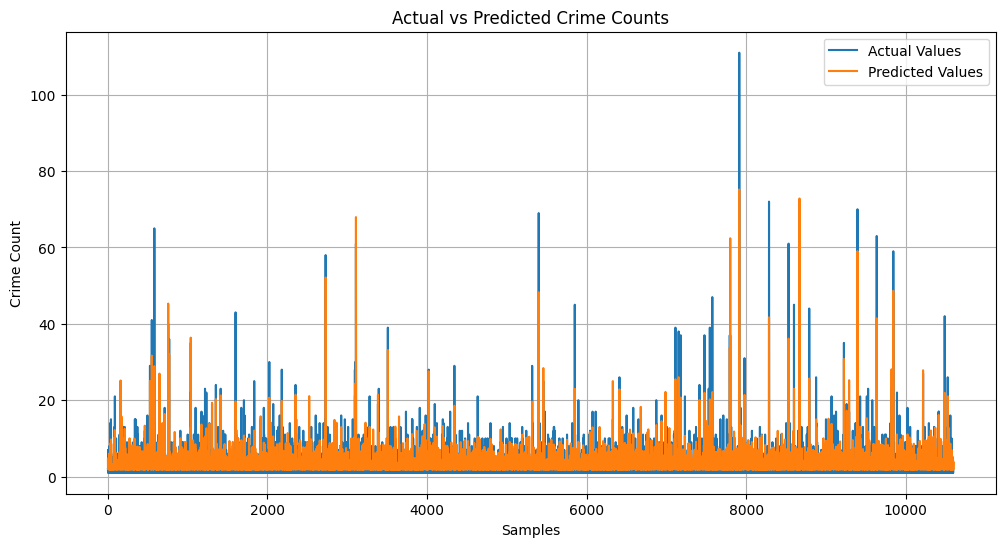

In [22]:
# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()


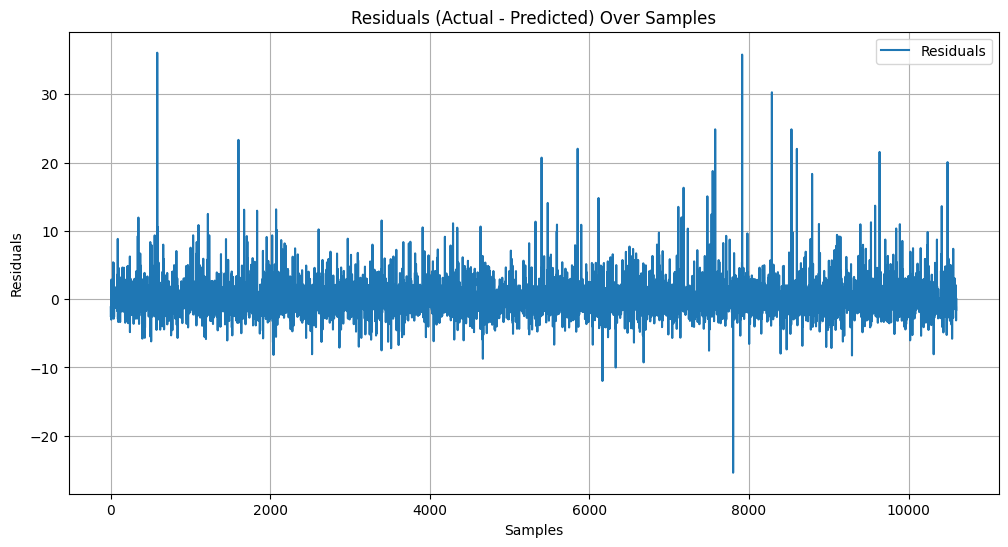

In [23]:
# Calculating residuals
residuals = y_test.flatten() - y_pred.flatten()

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals (Actual - Predicted) Over Samples')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()
